Download Dataset *Cheesman*

In [2]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2024-04-05 13:45:05--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2024-04-05 13:45:06--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   273MB/s    in 

In [3]:
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Knight', 'Pawn', 'King', 'Bishop', 'Rook', 'Queen']

In [5]:
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


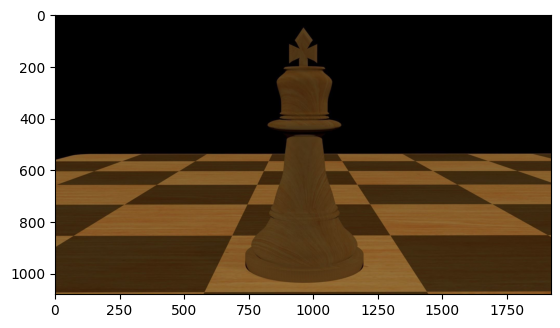

In [6]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
img_show = plt.imshow(img)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, shear_range=0.2, fill_mode = 'nearest', validation_split=0.1)

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=8, class_mode='categorical', subset='training')

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=16, class_mode='categorical', subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [10]:
model.compile(optimizer=tf.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
hist = model.fit(train_generator, validation_data=train_generator, epochs=50, verbose=2)

Epoch 1/50
4/4 - 7s - loss: 2.7294 - accuracy: 0.1346 - val_loss: 1.8477 - val_accuracy: 0.1538 - 7s/epoch - 2s/step
Epoch 2/50
4/4 - 7s - loss: 1.9202 - accuracy: 0.1923 - val_loss: 1.7886 - val_accuracy: 0.2500 - 7s/epoch - 2s/step
Epoch 3/50
4/4 - 5s - loss: 1.7909 - accuracy: 0.1731 - val_loss: 1.7906 - val_accuracy: 0.2500 - 5s/epoch - 1s/step
Epoch 4/50
4/4 - 11s - loss: 1.7900 - accuracy: 0.2115 - val_loss: 1.7901 - val_accuracy: 0.2308 - 11s/epoch - 3s/step
Epoch 5/50
4/4 - 10s - loss: 1.7894 - accuracy: 0.2115 - val_loss: 1.7895 - val_accuracy: 0.2115 - 10s/epoch - 2s/step
Epoch 6/50
4/4 - 7s - loss: 1.7870 - accuracy: 0.1731 - val_loss: 1.7859 - val_accuracy: 0.2500 - 7s/epoch - 2s/step
Epoch 7/50
4/4 - 5s - loss: 1.7798 - accuracy: 0.2115 - val_loss: 1.7777 - val_accuracy: 0.2308 - 5s/epoch - 1s/step
Epoch 8/50
4/4 - 6s - loss: 1.7907 - accuracy: 0.1923 - val_loss: 1.7756 - val_accuracy: 0.2115 - 6s/epoch - 1s/step
Epoch 9/50
4/4 - 4s - loss: 1.7762 - accuracy: 0.2115 - val_

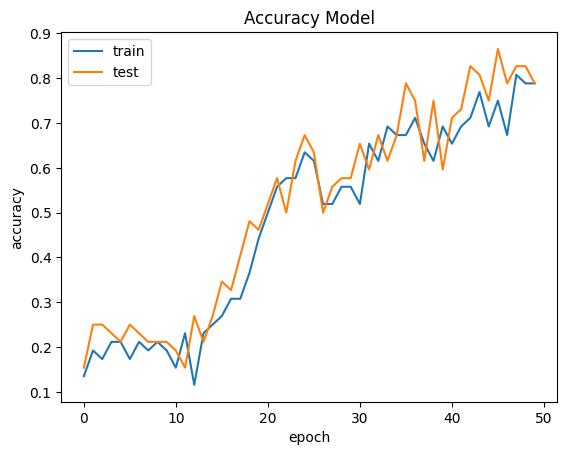

In [12]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

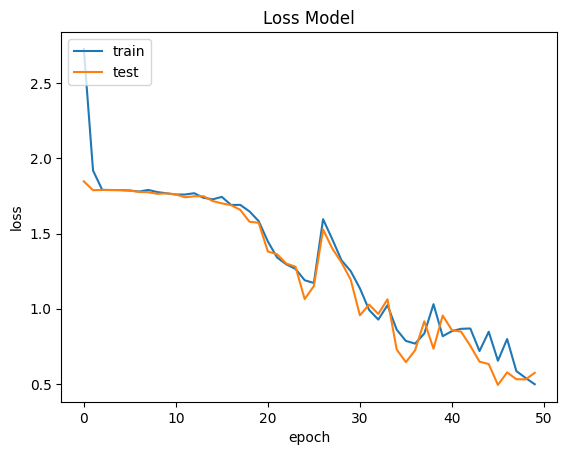

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()